
# Installation

## Loging into the web server

The easiest way to run this and other notebooks for staff and students at Monash University is to log into the Jupyter server at [https://sci-web17-v01.ocio.monash.edu.au/hub](https://sci-web17-v01.ocio.monash.edu.au/hub) The steps for running notebooks are:

* Log in using your monash email address. The first time you log in an empty account will automatically be set up for you.
* Press the start button (if prompted by the system)
* Use the menu of the jupyter system to upload a .ipynb python notebook file or to start a new notebook.


## Installing

Python runs on windows, linux, mac and other environments. 
There are many python distributions available. However the recommended way to install python under Microsoft Windows or Linux is to use the Anaconda distribution available at [https://www.continuum.io/downloads]([https://www.continuum.io/downloads). 
Make sure to get the Python 3.5 version, not 2.7. 
This distribution comes with the SciPy collection of scientific python tools as well as the iron python notebook. 
For developing python code without notebooks consider using spyder (also included with Anaconda)

To open a notebook with anaconda installed, from the terminal run:

```
ipython notebook
```



## Analytical solutions for the Unconfined Aquifer

This Notebook is a playground for students to experiment with the analytical solution for the unconfined groundwater well equation. 

In [22]:
%matplotlib notebook

In [23]:

import matplotlib.pyplot as plt
import numpy as np
import math

In [24]:
# Well equation for unconfined aquifer
def drawdown_unconfined(r, h0, h1, r1, Q, K):
    s = h0 - math.sqrt(h1 * h1 + Q / (math.pi * K) * math.log(r/r1)) 
    #Drawn can get negative when r2 > well influence
    if s < 0.:
        return 0.
    return s

In [25]:
delta = 1
dim_x = int(400 / delta) #This must be an integer
dim_y = int(400 / delta)

In [26]:
# Size of the domain
drawdown = np.zeros((dim_x, dim_y))

In [27]:
# Define well x,y, pump rate, r1, s1
well_1 = {"pos": (dim_x/2 / delta, dim_y/2 / delta),
                 "q": 0.05,
                 "r1": 50.,
                 "s1": 1.5,
                 "pumping": 1} #1 for extraction and -1 for injection

well_2 = {"pos": (dim_x/3 / delta, dim_y/2 / delta),
                 "q": 0.05,
                 "r1": 50.,
                 "s1": 1.5,
                 "pumping": 1} #1 for extraction and -1 for injection
well_3 = {"pos": (dim_x*2/3 / delta, dim_y/2 / delta),
                 "q": 0.05,
                 "r1": 50.,
                 "s1": 1.5,
                 "pumping": 1} #1 for extraction and -1 for injection

In [28]:
# Aquifer Constants
K = 18.3 / (24. * 60. * 60.)  # m/s
h0 = 25 # m

In [29]:
# Define all wells
wells = [well_1]

In [30]:
# For mutiple wells
wells = [well_2, well_3]

In [31]:
# Iterate over all wells
for well in wells:
    for x in range(dim_x):
        for y in range(dim_y):
            # Distance to well
            r = delta * math.sqrt(
                math.pow(x - well["pos"][0], 2) + 
                math.pow(y - well["pos"][1], 2)
            )
            if r < 0.25: #Assume well radius is 25 cm
                r = 0.25
            #Cacluate drawdown at position x, y. Drawdown is caluclated as h0 - h2
            s = drawdown_unconfined(
                r,
                h0, 
                h0 - well["s1"], 
                well["r1"], 
                well["q"], 
                K) * well["pumping"]
            drawdown[x,y] += s
            #drawdown += 


In [32]:
# Cross Section
sy_200 = []
sx_200 = []
for x in range(dim_x):
    sx_200.append(x)
    sy_200.append((-drawdown[x,200]))

<IPython.core.display.Javascript object>


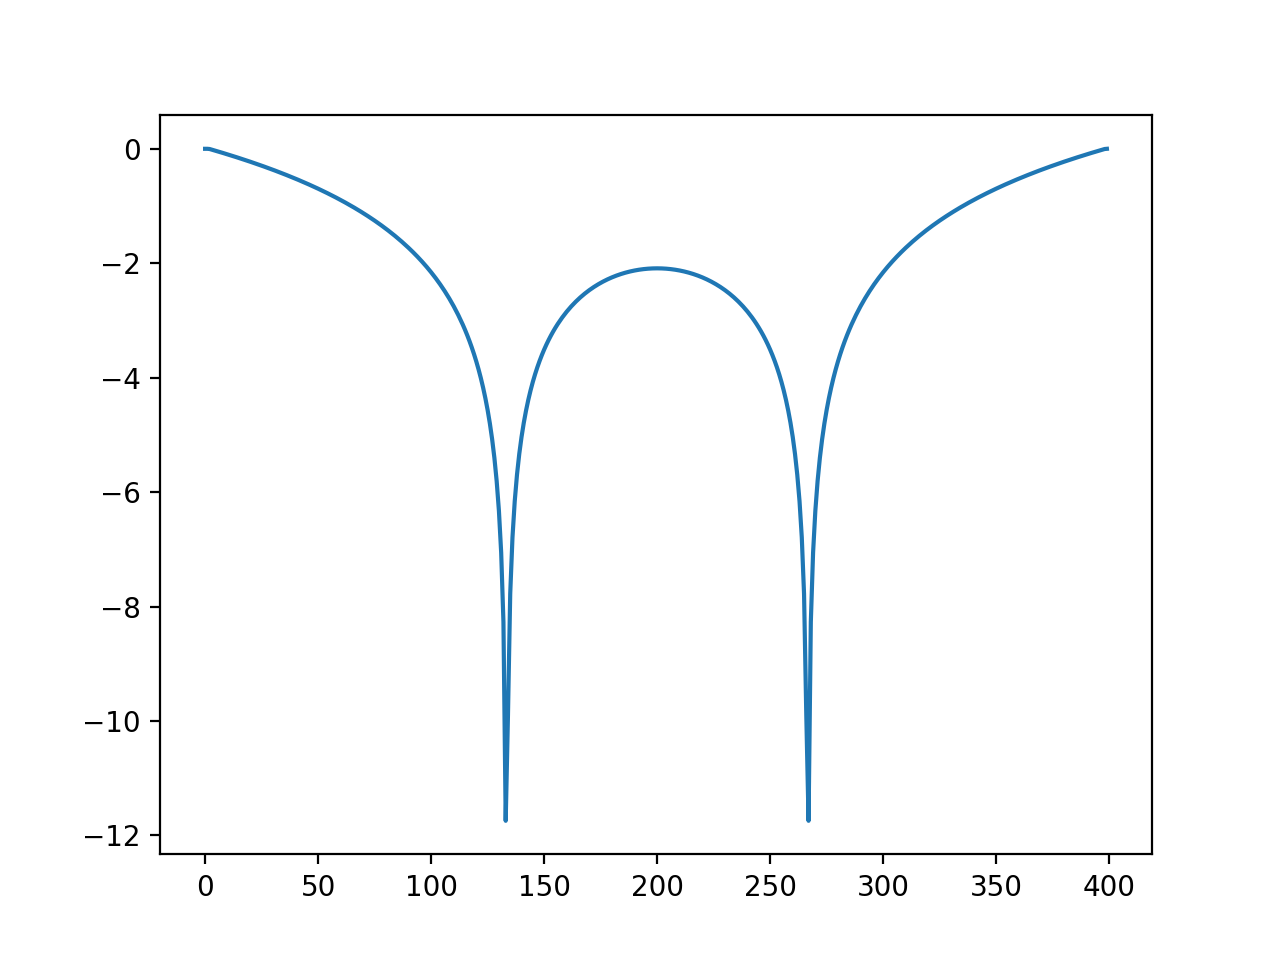

In [40]:
fig1=plt.figure(1)
plt.plot(sx_200,sy_200)

In [34]:
plt.close(1)

<IPython.core.display.Javascript object>


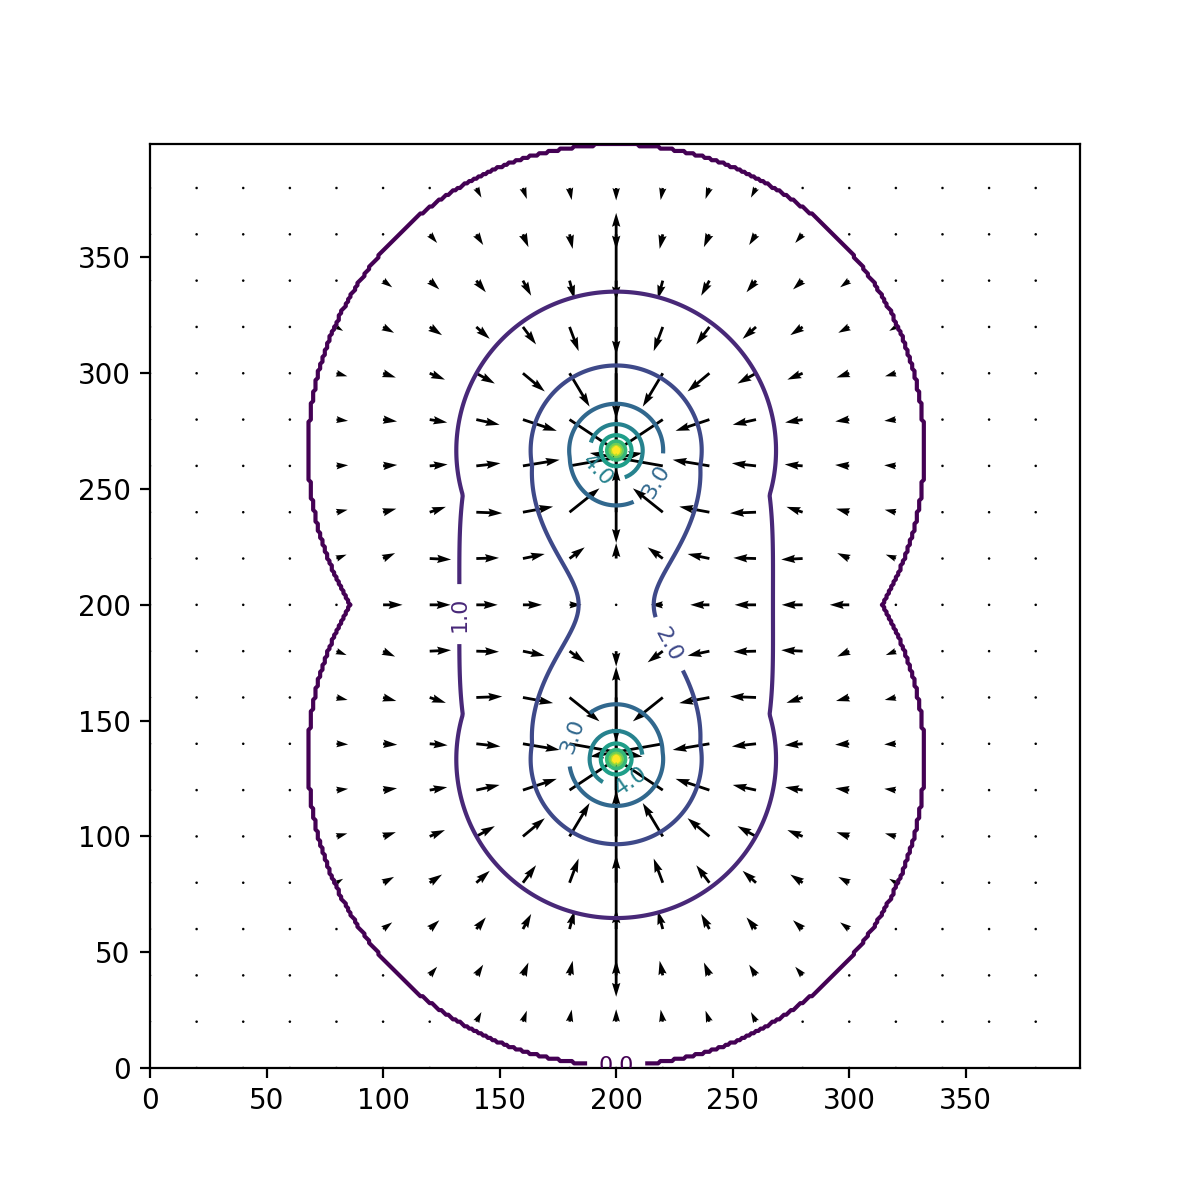

In [39]:
fig1=plt.figure(2, figsize=(6,6))
levels = range(10)
CS = plt.contour(drawdown, levels = levels)
CS.levels = ['%.1f'% val for val in CS.levels]
plt.clabel(CS, CS.levels, inline=True, fontsize=8)

[dhdx, dhdy] = np.gradient(drawdown)
idx_x, idx_y = np.meshgrid(np.arange(dim_x) , np.arange(dim_y),  indexing='ij', sparse=False)

mask = np.logical_or(dhdx != 0,dhdy !=0) ## <-- corrected: one operation less

#compute positions and lengths of all non-zero vectors

skip = (slice(None, None, 20), slice(None, None,20))

X = idx_x
Y = idx_y
U = dhdx
V = dhdy

plt.quiver( Y[skip], X[skip], V[skip],U[skip], scale = 1)


In [36]:
plt.close(2)

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

<IPython.core.display.Javascript object>


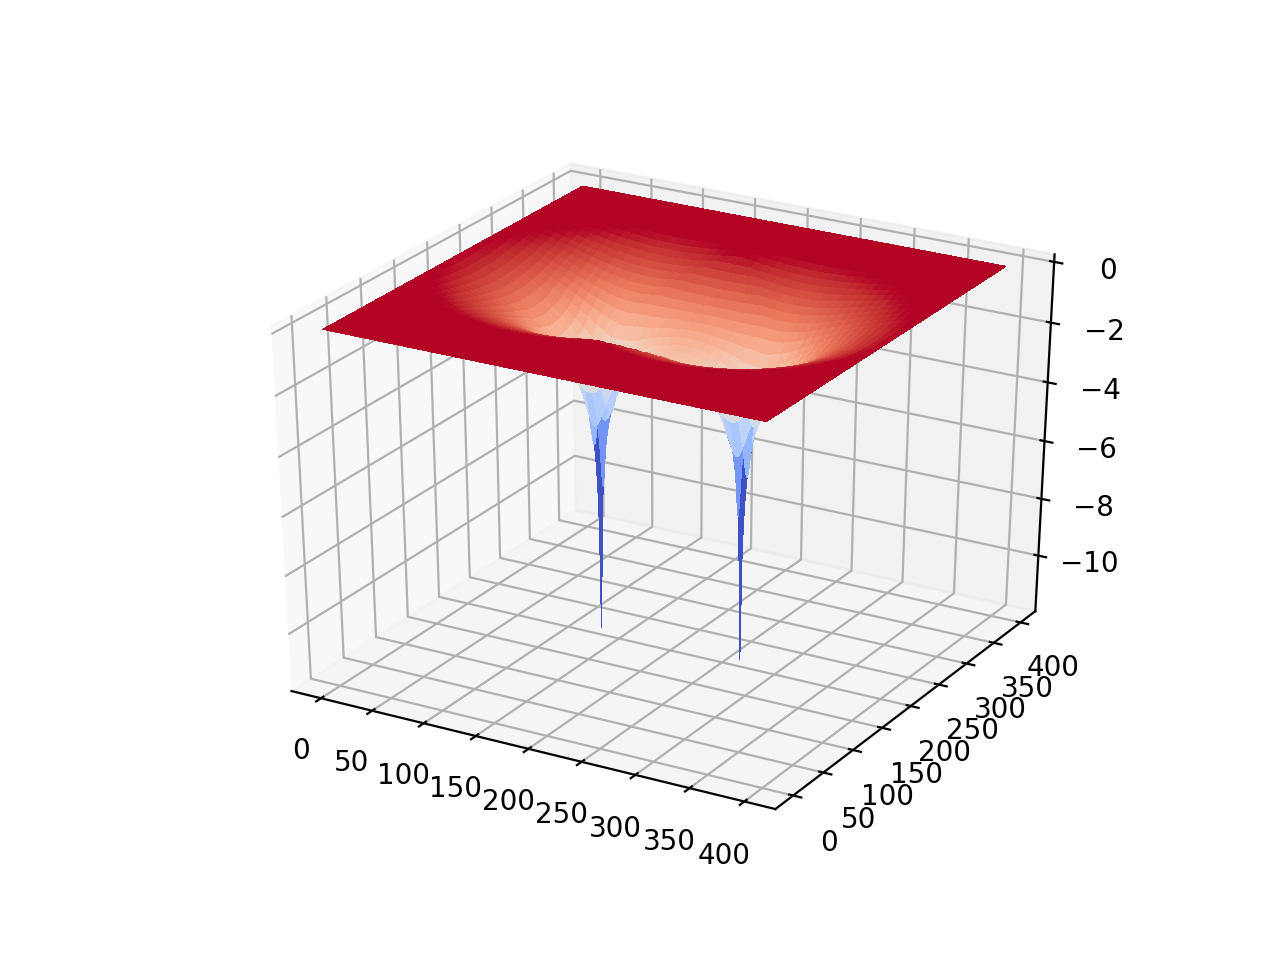

In [38]:
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, -drawdown, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)